In [139]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as astro 
import pandas as pd
#import camb as cb
%matplotlib inline

In [140]:
from pylab import imshow
from numpy import random
from PIL import Image
from scipy.fftpack import fft 
from scipy.fftpack import ifft 
from numpy.linalg import inv
from __future__ import division

In [141]:
#hitsmap part 
#Hitmap=np.random.rand(10,10) #generate random array and graph 
#np.clip(Hitmap,0,1) 
Hitmap=[[0.22,0.84,0.55],[0.41,0.06,0.67],[0.90,0.72,0.33]]
print('Array of Hitmap',Hitmap)

Array of Hitmap [[0.22, 0.84, 0.55], [0.41, 0.06, 0.67], [0.9, 0.72, 0.33]]


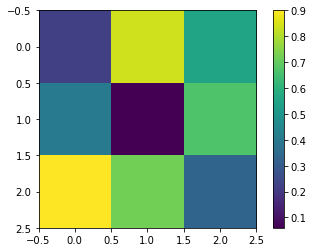

In [142]:
plt.colorbar(imshow(Hitmap))
imshow(Hitmap)

In [143]:
M=np.mean(Hitmap)
print('mean of Hitmap',M) 
length=len(Hitmap)
print('length of Hitmap',length)

mean of Hitmap 0.5222222222222223
length of Hitmap 3


In [144]:
#Fourrier Space Amplitude

In [145]:
#A_noise

In [146]:
Spectrum=np.fft.fft(Hitmap) #fft of Hitmap
#Spectrum=np.fft.fft2(Hitmap) #fft2 of Hitmap
#Spectrum=np.fft.fftn(Hitmap) #fftn of Hitmap
Abs=np.abs(Spectrum)
#print(Spectrum)
#print(Abs)

Inverse=inv(np.matrix(Hitmap))
#Transpose=np.transpose(Hitmap)

A_n= Inverse * Abs 
A_noise=np.abs(A_n*A_n)#squaring the amplitude
print('A_noise',A_noise) 

A_noise [[1.38610024 0.35070104 0.35070104]
 [1.31509962 0.32171035 0.32171035]
 [2.3181645  0.73127782 0.73127782]]


In [147]:
#plt.colorbar(imshow(Abs))
#imshow(Abs)

In [148]:
#plt.colorbar(imshow(Inverse))
#imshow(Inverse)

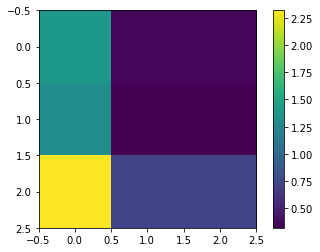

In [149]:
plt.colorbar(imshow(A_noise))
imshow(A_noise)
#the ends have always been uniform
#there may be something wrong with the fourier transform

In [150]:
def Noisemap(Hitmap,A_noise): 
    norm=np.random.normal(M,length)
    np.clip(norm,0,1) 
    Inital = np.abs(A_noise * norm)
    Final = np.abs(np.fft.ifft(Inital/Hitmap))#inverse fourier transform to turn into real space
    print('Inital',Inital)
    print('Final',Final)   
    plt.colorbar(imshow(Final))
    imshow(Final)

Inital [[0.22054031 0.05579951 0.05579951]
 [0.20924351 0.05118685 0.05118685]
 [0.36883965 0.11635251 0.11635251]]
Final [[0.39011254 0.30633862 0.30633862]
 [0.47995414 0.22473303 0.22473303]
 [0.30800196 0.07504234 0.07504234]]


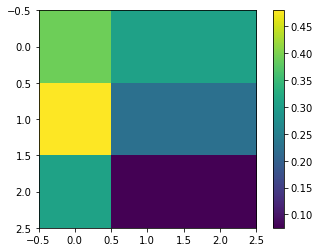

In [151]:
Noisemap(Hitmap,A_noise)